# **Importing Libraries**
## First we need to import all the Libraries needed.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Then import the csv file as df

In [ ]:
df = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='latin-1')

In [ ]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# **DATA CLEANING AND MANIPULATION**
## After it we observe the columns that have Null Values


In [ ]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

## Dropping the Column *PctSomeCol18_24* because of high percentage of null values.

In [ ]:
df=df.drop(columns=['PctSomeCol18_24'],axis=1)

## Filling mean values in columns *PctEmployed16_Over* and *PctPrivateCoverageAlone* in place of null values

In [ ]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(value=df['PctEmployed16_Over'].mean())

In [ ]:
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(value=df['PctPrivateCoverageAlone'].mean())

## No null values remain in data:

In [ ]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

# **DATA SPLITTING**
## Splitting the data as 70% for training and 30% for testing

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

### Normalization using Min-Max Scaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
num_vars=['avgAnnCount','avgDeathsPerYear','TARGET_deathRate','incidenceRate','medIncome','popEst2015','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','povertyPercent','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate','PctPublicCoverage','PctPublicCoverageAlone']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3008,0.005873,0.005926,0.345567,0.313246,0.197738,0.003327,0.310680,0.040772,"(40362.7, 42724.4]",0.031401,0.371158,0.442396,"Wapello County, Iowa",0.597254,0.589069,0.355694,0.213846,0.110039,0.626932,0.226913,0.632000,0.254355,0.652244,0.515957,44.7,0.513915,0.389920,0.911816,0.023985,0.021062,0.083673,0.479597,0.289798
2196,0.004483,0.005354,0.425509,0.271281,0.325497,0.003160,0.155340,0.000000,"(54545.6, 61494.5]",0.029607,0.368794,0.400922,"Jasper County, Indiana",0.680843,0.672065,0.255850,0.429231,0.137066,0.761589,0.189974,0.652800,0.195122,0.745192,0.677305,53.4,0.319109,0.275862,0.964110,0.008592,0.005121,0.016186,0.668582,0.291243
1666,0.008101,0.010423,0.385901,0.221659,0.238068,0.005737,0.257282,0.008582,"(45201, 48021.6]",0.034093,0.399527,0.476959,"Sandusky County, Ohio",0.625117,0.564777,0.140406,0.506154,0.102317,0.766004,0.189974,0.660800,0.240418,0.732372,0.492088,52.7,0.413729,0.336870,0.894681,0.039455,0.008265,0.079210,0.481470,0.258444
2319,0.000603,0.000643,0.202035,0.161695,0.228638,0.000451,0.230583,0.000000,"(45201, 48021.6]",0.030863,0.390071,0.414747,"Bear Lake County, Idaho",0.630183,0.838057,0.371295,0.552308,0.044402,0.677704,0.345646,0.584842,0.090592,0.711538,0.583333,41.9,0.398887,0.305040,0.955298,0.005485,0.024495,0.046582,0.716270,0.451959
918,0.001730,0.001571,0.246730,0.245426,0.393356,0.001920,0.186893,0.000000,"(61494.5, 125635]",0.014175,0.191489,0.177419,"Duchesne County, Utah",0.739102,0.848178,0.400936,0.538462,0.028958,0.611479,0.224274,0.635200,0.156794,0.735577,0.742908,56.9,0.161410,0.137931,0.900626,0.001996,0.011722,0.041640,0.776392,0.469535


## Plotting the **Heat Map** for checking co-relation in variables:

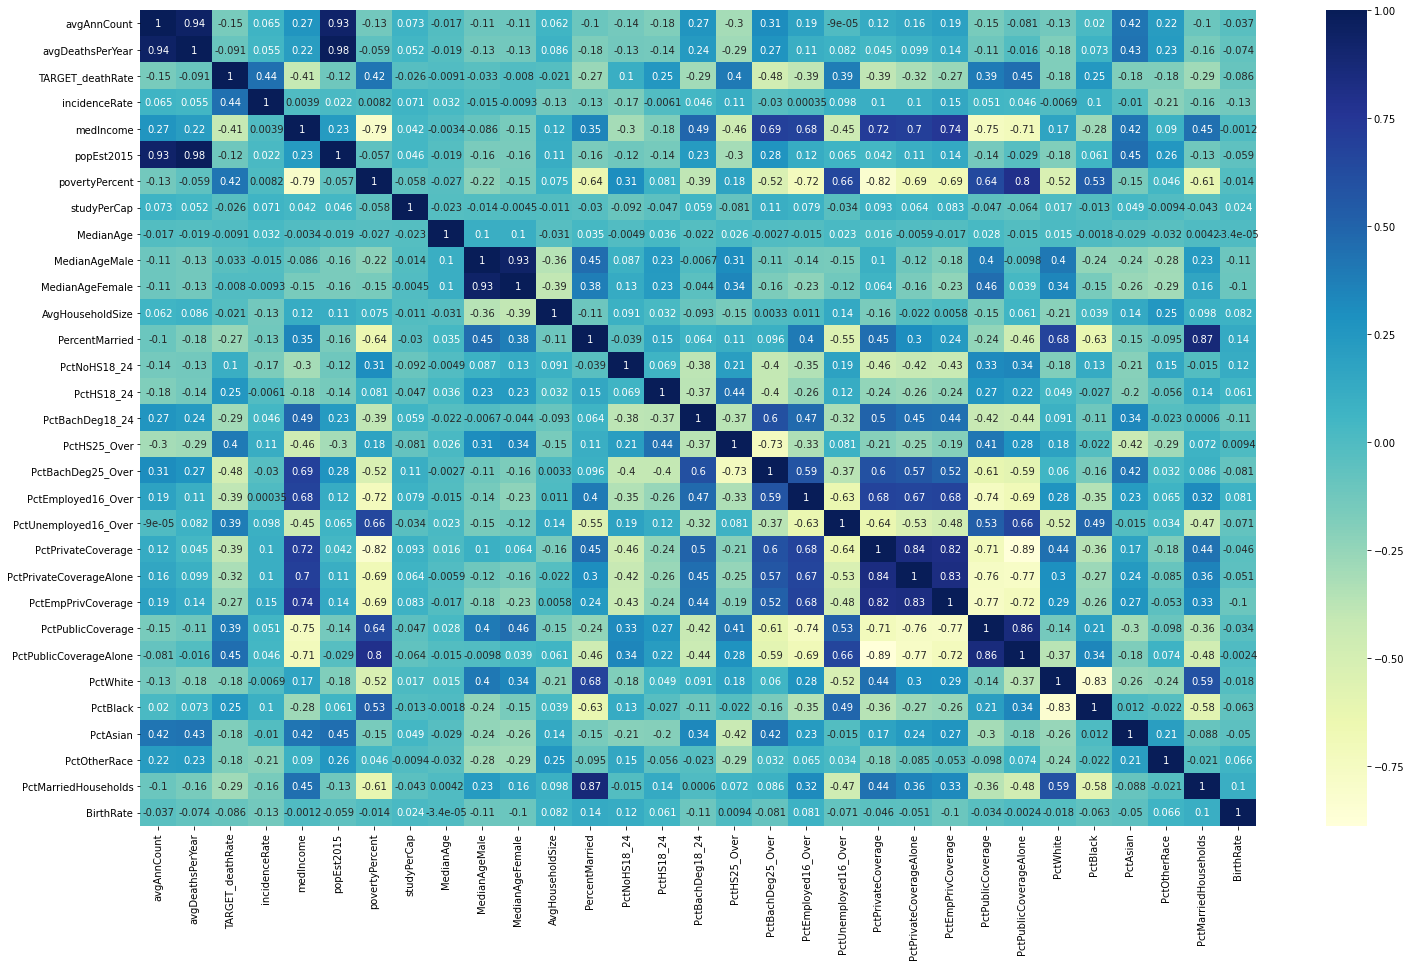

In [ ]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [ ]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

## The Variables with high co-relation with *avgDeathsPerYear* are:


*incidenceRate* <br>
*povertyPercent*<br>
*PctHS25_Over*<br>
*PctUnemployed16_Over*<br>
*PctPublicCoverage*<br>
*PctPublicCoverageAlone*<br>

# **Removing outliers**
## Plotting the scatter graph to check and remove the outliers of each variables with *TARGET_deathRate*:

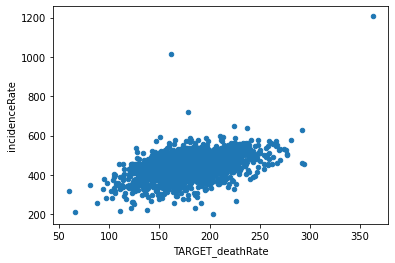

In [ ]:
df.plot.scatter('TARGET_deathRate', 'incidenceRate')
plt.show()

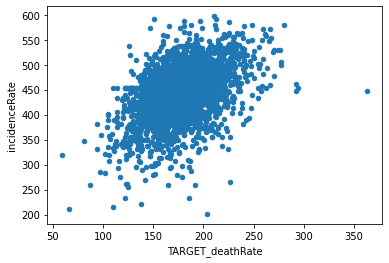

In [ ]:
df.loc[df['incidenceRate']>600,'incidenceRate'] = np.mean(df['incidenceRate'])
df.plot.scatter('TARGET_deathRate', 'incidenceRate')
plt.show()

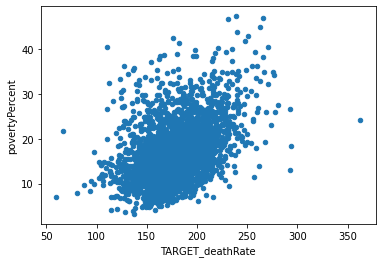

In [ ]:
df.plot.scatter('TARGET_deathRate', 'povertyPercent')
plt.show()

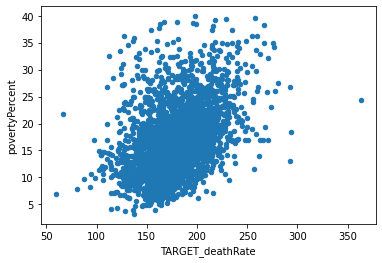

In [ ]:
df.loc[df['povertyPercent']>40,'povertyPercent'] = np.mean(df['povertyPercent'])
df.plot.scatter('TARGET_deathRate', 'povertyPercent')
plt.show()

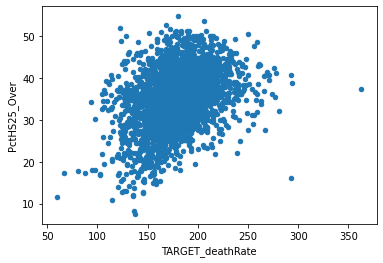

In [ ]:
df.plot.scatter('TARGET_deathRate', 'PctHS25_Over')
plt.show()

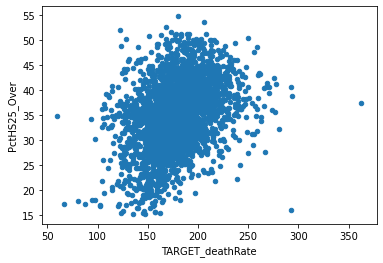

In [ ]:
df.loc[df['PctHS25_Over']<15,'PctHS25_Over'] = np.mean(df['PctHS25_Over'])
df.plot.scatter('TARGET_deathRate', 'PctHS25_Over')
plt.show()

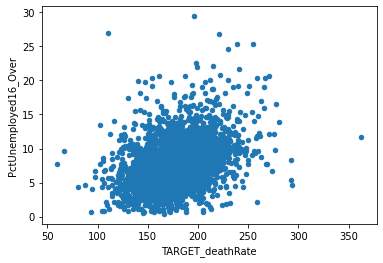

In [ ]:
df.plot.scatter('TARGET_deathRate', 'PctUnemployed16_Over')
plt.show()

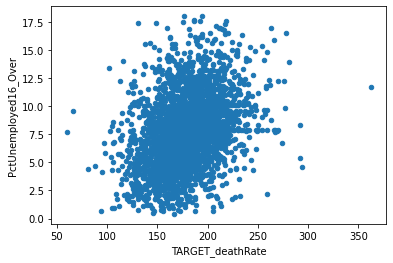

In [ ]:
df.loc[df['PctUnemployed16_Over']>18,'PctUnemployed16_Over'] = np.mean(df['PctUnemployed16_Over'])
df.plot.scatter('TARGET_deathRate', 'PctUnemployed16_Over')
plt.show()

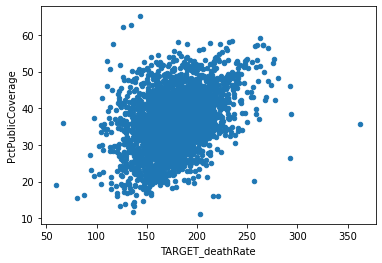

In [ ]:
df.plot.scatter('TARGET_deathRate', 'PctPublicCoverage')
plt.show()

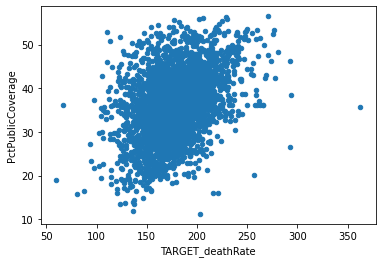

In [ ]:
df.loc[df['PctPublicCoverage']>57,'PctPublicCoverage'] = np.mean(df['PctPublicCoverage'])
df.plot.scatter('TARGET_deathRate', 'PctPublicCoverage')
plt.show()

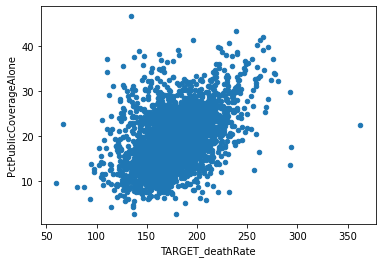

In [ ]:
df.plot.scatter('TARGET_deathRate', 'PctPublicCoverageAlone')
plt.show()

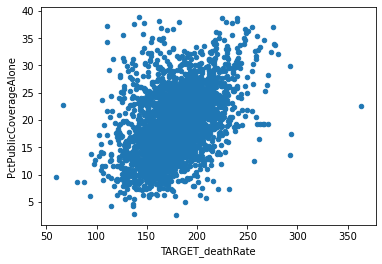

In [ ]:
df.loc[df['PctPublicCoverageAlone']>39,'PctPublicCoverageAlone'] = np.mean(df['PctPublicCoverageAlone'])
df.plot.scatter('TARGET_deathRate', 'PctPublicCoverageAlone')
plt.show()

# **Training of Model**


### Extracting target variable and creating train variable.

In [ ]:
y_train=df_train.pop('TARGET_deathRate')
x_train=df_train

### Fitting and training of model

In [ ]:
x_train_lm=sm.add_constant(x_train[['PctPublicCoverageAlone']])

lr=sm.OLS(y_train,x_train_lm).fit()

In [ ]:
lr.params

const                     0.221305
PctPublicCoverageAlone    0.277925
dtype: float64

# **Plotting the trained model(linear).**

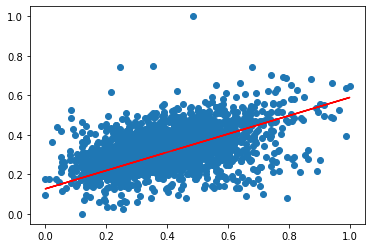

In [ ]:
plt.scatter(x_train_lm.iloc[:, 1], y_train)
plt.plot(x_train_lm.iloc[:, 1], 0.127 + 0.462*x_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     541.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          6.18e-107
Time:                        17:24:58   Log-Likelihood:                 2134.3
No. Observations:                2132   AIC:                            -4265.
Df Residuals:                    2130   BIC:                            -4253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Inserting Next Variables with high co-relation

In [ ]:
x_train_lm=sm.add_constant(x_train[['PctPublicCoverageAlone','incidenceRate']])

lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

const                     0.037252
PctPublicCoverageAlone    0.265948
incidenceRate             0.765468
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     650.0
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          4.59e-221
Time:                        17:24:58   Log-Likelihood:                 2400.8
No. Observations:                2132   AIC:                            -4796.
Df Residuals:                    2129   BIC:                            -4779.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
x_train_lm=sm.add_constant(x_train[['incidenceRate','povertyPercent','PctHS25_Over','PctUnemployed16_Over','PctPublicCoverage','PctPublicCoverageAlone']])

lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

const                    -0.033591
incidenceRate             0.707377
povertyPercent            0.117248
PctHS25_Over              0.195909
PctUnemployed16_Over      0.094643
PctPublicCoverage        -0.095834
PctPublicCoverageAlone    0.151432
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     313.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          2.97e-288
Time:                        17:24:58   Log-Likelihood:                 2568.8
No. Observations:                2132   AIC:                            -5124.
Df Residuals:                    2125   BIC:                            -5084.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

# **Checking for VIF value**



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['features']=x_train_lm.columns
vif['VIF']=[variance_inflation_factor(x_train_lm.values,1) for i in range(x_train_lm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,features,VIF
0,const,1.03
1,incidenceRate,1.03
2,povertyPercent,1.03
3,PctHS25_Over,1.03
4,PctUnemployed16_Over,1.03
5,PctPublicCoverage,1.03
6,PctPublicCoverageAlone,1.03


### Residual analysis of trained data

In [ ]:
y_train_death=lr.predict(x_train_lm)

Text(0.5, 0, 'Errors')

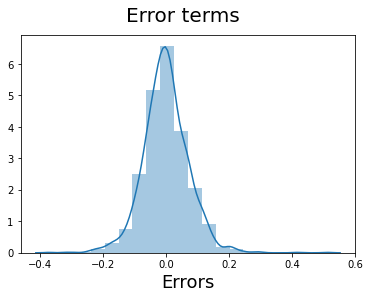

In [ ]:
fig=plt.figure()
sns.distplot((y_train-y_train_death),bins=20)
fig.suptitle('Error terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

# **Final Prediction(using main model)**

In [ ]:
num_vars=['avgAnnCount','avgDeathsPerYear','TARGET_deathRate','incidenceRate','medIncome','popEst2015','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','povertyPercent','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate','PctPublicCoverage','PctPublicCoverageAlone']

df_test[num_vars]=scaler.transform(df_test[num_vars])

In [ ]:
df_test.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.015059,0.012831,0.326581,0.242969,0.247708,0.010016,0.313661,0.017628,0.040763,0.404759,0.454124,0.620944,0.579250,0.282399,0.421977,0.120444,0.577474,0.292288,0.584891,0.250338,0.598583,0.494929,41.421530,0.460750,0.394124,0.820023,0.103592,0.030053,0.045342,0.514548,0.262842
std,0.031431,0.029599,0.103582,0.053125,0.124834,0.028056,0.156898,0.050684,0.083468,0.121153,0.121110,0.116909,0.136997,0.126496,0.137864,0.087995,0.157138,0.147401,0.129119,0.120092,0.171493,0.162494,9.643108,0.147297,0.163930,0.178652,0.161966,0.058114,0.073952,0.121452,0.091600
min,-0.000026,0.000000,-0.101381,0.009745,0.016250,-0.000050,-0.016990,0.000000,0.002871,0.009456,0.052995,0.000025,0.085020,0.000000,-0.109231,0.000000,-0.017660,0.005277,0.030400,-0.010453,-0.078526,-0.088652,13.500000,0.042672,-0.042440,-0.009113,0.000000,0.000000,0.000000,0.016759,0.000000
25%,0.001914,0.001856,0.261083,0.213654,0.158658,0.001072,0.196602,0.000000,0.027454,0.328605,0.380184,0.597254,0.497976,0.198128,0.336154,0.059846,0.481236,0.182058,0.500000,0.174216,0.492788,0.400709,34.600000,0.353432,0.278515,0.745538,0.006986,0.006138,0.007276,0.445023,0.213126
50%,0.004614,0.004641,0.328488,0.250845,0.228818,0.002743,0.291262,0.000000,0.033196,0.401891,0.458525,0.627650,0.591093,0.268331,0.416923,0.108108,0.587196,0.266491,0.584842,0.240418,0.605769,0.492088,41.400000,0.461967,0.381963,0.889494,0.027108,0.013370,0.020466,0.522192,0.251940
75%,0.013397,0.011173,0.391897,0.278839,0.306037,0.007531,0.400485,0.011431,0.038399,0.472813,0.525346,0.663112,0.676113,0.351794,0.510769,0.158301,0.684327,0.373351,0.681600,0.317073,0.722756,0.592199,47.800000,0.565863,0.502653,0.949593,0.119383,0.031108,0.052574,0.590448,0.300453
max,0.379362,0.364461,0.677326,0.447494,1.029940,0.446131,1.055825,0.697626,1.079670,0.789598,0.838710,1.000000,0.896761,0.931357,1.006154,0.777992,1.026490,1.047493,0.942400,0.916376,1.043269,1.031915,70.700000,0.955473,1.124668,1.001735,0.896736,0.836243,0.878328,0.873856,0.838271


### Dividing into *x_test* and *y_test*

In [ ]:
y_test = df_test.pop('TARGET_deathRate')
x_test = df_test[['PctPublicCoverageAlone','incidenceRate','povertyPercent','PctHS25_Over','PctUnemployed16_Over','PctPublicCoverage']]

In [ ]:
x_test_m=sm.add_constant(x_test)

In [ ]:
y_pred_m=lr.predict(x_test_m)

### Model evaluation

Text(0, 0.5, 'y_pred')

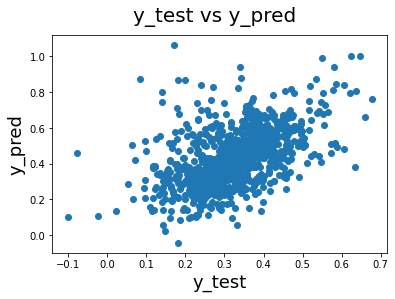

In [ ]:
fig=plt.figure()
plt.scatter(y_test,y_pred_m)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)